In [1]:
import gradflow.functions as F

from datasets.mnist import MNISTDataset

import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Autoencoder:
  def __init__(self, encoding_dim = 48):
    self.encoding_dim = encoding_dim
    self.encoder_layers = [
      F.Linear(28*28, encoding_dim),
      F.ReLU()
    ]
    self.decoder_layers = [
      F.Linear(encoding_dim, 28*28),
      F.Sigmoid()
    ]
  
  def parameters(self):
    # TODO: DO BETER
    return self.encoder_layers[0].parameters() + self.decoder_layers[0].parameters()
  
  def encode(self, x):
    out = x
    for layer in self.encoder_layers:
      out = layer(out)
    return out

  def decode(self, x):
    out = x
    for layer in self.decoder_layers:
      out = layer(out)
    return out
  
  def __call__(self, x):
    out = self.encode(x)
    out = self.decode(out)
    return out

In [3]:
train_dset = MNISTDataset("../data/", batch_size=32*3)
test_dset = MNISTDataset("../data/", batch_size=10, train=False)

train-images-idx3-ubyte.gz already exists in ../data. Skipping...
t10k-images-idx3-ubyte.gz already exists in ../data. Skipping...
train-labels-idx1-ubyte.gz already exists in ../data. Skipping...
t10k-labels-idx1-ubyte.gz already exists in ../data. Skipping...
train-images-idx3-ubyte.gz already exists in ../data. Skipping...
t10k-images-idx3-ubyte.gz already exists in ../data. Skipping...
train-labels-idx1-ubyte.gz already exists in ../data. Skipping...
t10k-labels-idx1-ubyte.gz already exists in ../data. Skipping...


In [4]:
model = Autoencoder()
criterion = F.BCELoss()
lr = 0.1

In [5]:
training_loss = []
for epoch in range(50):
  for i, (imgs, labels) in enumerate(train_dset):
    for param in model.parameters():
      param.grad = 0

    outputs = model(imgs)
    loss = criterion(outputs, imgs)
    training_loss += [loss.data]
    print(loss.data)

    loss.backward()

    if ((i + 1) % 500 == 0):
      print(loss.data)

    for param in model.parameters():
      param.data = param.data - lr * param.grad

0.7193936
0.717739
0.7155344
0.7136683
0.711877
0.7092119
0.70769817
0.7087865
0.708137
0.7055395
0.7016561
0.70061773
0.7047052
0.705627
0.7021216
0.69528526
0.6930953
0.69360447
0.6904456
0.6912375
0.6942803
0.6901242
0.68663067
0.68332
0.683154
0.6830337
0.6811079
0.679355
0.6777354
0.67718863
0.674815
0.6725816
0.6716994
0.6714959
0.6704705
0.6705751
0.6684556
0.6706009
0.6652534
0.6648513
0.6612594
0.6594376
0.66023344
0.6599768
0.6589736
0.65678066
0.6586642
0.65429395
0.6543463
0.65464175
0.65344566
0.6491912
0.64706826
0.6463291
0.6445437
0.642912
0.64060503
0.640949
0.6405066
0.6405842
0.6389627
0.6370899
0.6353094
0.6341593
0.63061047
0.6283652
0.6245216
0.62849796
0.6244206
0.6267527
0.6282796
0.6237542
0.6213677
0.6204743
0.61884326
0.6230024
0.6255597
0.61888725
0.619408
0.61463886
0.6115338
0.61272377
0.60650593
0.608091
0.60457796
0.6052229
0.6042199
0.60106677
0.59578794
0.5982092
0.5944977
0.5955128
0.59602416
0.5971248
0.5911111
0.5964866
0.5950596
0.5909076
0.5915708

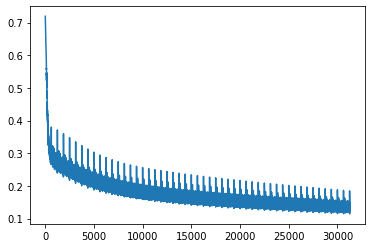

In [6]:
plt.plot(training_loss)

Encoding: [ 0.6296377   1.4879485   5.6912436   0.35758257  2.9229522   0.7184223
 -0.         -0.          6.322488    0.52355087  5.260177    7.794535
 -0.          3.7247093   3.2029212  12.011817    2.4341328  -0.
  0.27820194 -0.          2.8009863   4.4369416   6.591812    1.5916969
 11.732538   -0.          0.2556851   5.950565    5.7832365  12.415468
 -0.          0.34592342 10.295247   -0.          2.4815633   9.498482
 -0.          2.848238   15.774941    1.775213    5.052579    4.387567
  1.0961194   6.711056    9.488358    4.9430585   0.6680045   3.7238562 ]


Text(0.5, 1.0, 'Predicted')

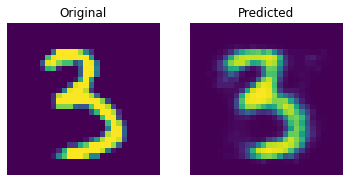

In [7]:
batch = 3
im = 2

true_imgs = test_dset[batch][0]

encodings = model.encode(true_imgs)
print("Encoding:", encodings.data[im])

pred_imgs = model.decode(encodings)

fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(true_imgs.data[im].reshape(28, 28))
plt.axis("off")
plt.title("Original")

fig.add_subplot(1, 2, 2)
plt.imshow(pred_imgs.data[im].reshape(28, 28))
plt.axis("off")
plt.title("Predicted")

In [8]:
def print_batch(batch, width, height, show_orig = True):
  true_imgs, true_labels = batch
  pred_imgs = model(true_imgs)

  i = 1
  fig = plt.figure(figsize=(height*3, width*4))
  for w in range(width):
    for h in range(height):
      idx = w * height + h
      label = np.argmax(true_labels.data[idx])

      if show_orig:
        fig.add_subplot(width * 2, height * 2, i); i+=1
        plt.imshow(true_imgs.data[idx].reshape(28, 28))
        plt.axis("off")
        plt.title(f"Original ({label})")

      fig.add_subplot(width * 2, height * 2, i); i+=1
      plt.imshow(pred_imgs.data[idx].reshape(28, 28))
      plt.axis("off")
      plt.title(f"Predicted ({label})")

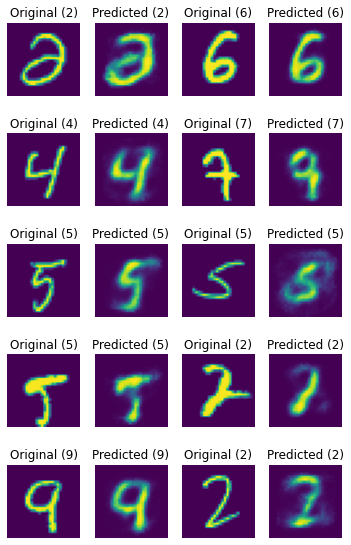

In [9]:
print_batch(test_dset[333], 5, 2)